In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def cds_spread(hazard_rate, recovery_rate, notional, maturity, frequency, risk_free_rate):
    """Calculates the CDS spread given the inputs."""
    
    dt = 1 / frequency
    no_of_periods = int(maturity * frequency)
    survival_probability = np.exp(-hazard_rate * np.arange(1, no_of_periods + 1) / frequency)
    discount_factors = np.exp(-risk_free_rate * np.arange(1, no_of_periods + 1) / frequency)
    expected_premiums = (1 - survival_probability) * discount_factors
    expected_protection = (1 - recovery_rate) * np.sum(expected_premiums)
    annual_premium = expected_protection / (np.sum(discount_factors * survival_probability) * dt)
    
    return annual_premium * notional


CDS Spread: 221882.43 basis points


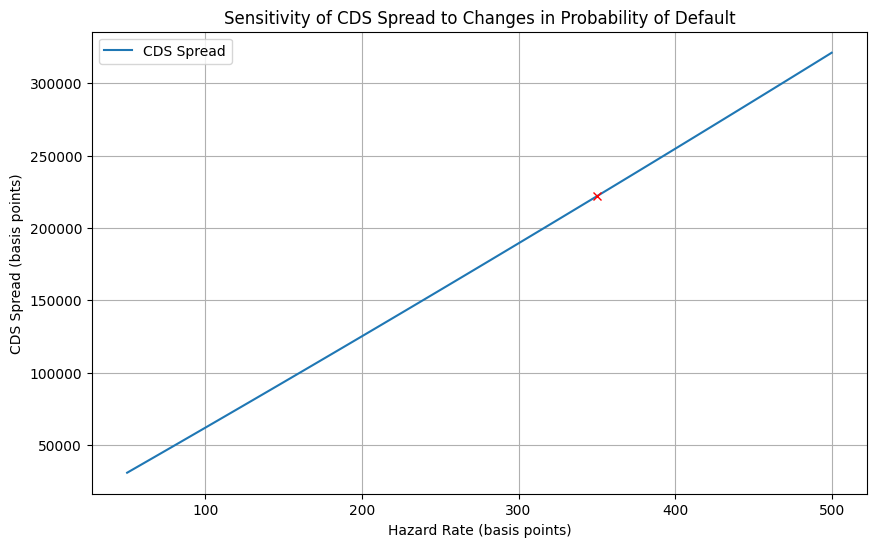

In [20]:
# Parameters
hazard_rate = 0.035  # The probability of default per year
recovery_rate = 0.4  # The percentage notionl recovered in case of default
notional = 1000000  # The notional amount of the reference asset
maturity = 5  # The maturity of the CDS contract in years
frequency = 4  # Number of premium payments per year
risk_free_rate = 0.03  # The risk-free rate

# Calculate CDS Spread
spread = cds_spread(hazard_rate, recovery_rate, notional, maturity, frequency, risk_free_rate)
print(f"CDS Spread: {spread:.2f} basis points")

# Sensitivity Analysis
hazard_rates = np.linspace(0.005, 0.05, 100)
spreads = [cds_spread(h, recovery_rate, notional, maturity, frequency, risk_free_rate) for h in hazard_rates]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hazard_rates * 10000, spreads, label='CDS Spread')
plt.plot(hazard_rate * 10000, spread, marker="x", color="red")
plt.xlabel('Hazard Rate (basis points)')
plt.ylabel('CDS Spread (basis points)')
plt.title('Sensitivity of CDS Spread to Changes in Probability of Default')
plt.grid(True)
plt.legend()
plt.show()